In [2]:
import pandas as pd
import numpy as np

import seaborn as sns  # Importar seaborn correctamente
import matplotlib.pyplot as plt  # Corregir el nombre del módulo
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV


In [3]:
train_df = pd.read_csv('C:/Users/loren/Desktop/ML_Workspace/Projects/Titanic-Machine_Learning_from_disaster/data/train.csv', encoding='utf-8')
test_df = pd.read_csv('C:/Users/loren/Desktop/ML_Workspace/Projects/Titanic-Machine_Learning_from_disaster/data/test.csv', encoding='utf-8')


In [4]:
train_df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [5]:
test_df.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
train_df.describe(include=['O'])

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

In [9]:
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()

Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000

In [10]:
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1

In [11]:
train_df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  Family_size  
0      0         A/5 21171   7.2500   NaN        S            2  
1      0          PC 17599  71.2833   C85        C            2  
2      0  STON/O2. 3101282   7.9250   NaN        S            1  
3      0            113803  53.1000  C123        S            2  
4      0            373450   8.0500   NaN        S            1  
5      0            330877   8.4583   NaN        Q            1  
6      0             17463  51.8625   E46        S            1  
7      1            349909  21.0750   NaN        S            5  
8      2            347742  11.1333   NaN        S            3  
9      0            237736  30.0708   NaN        C            2

In [12]:
train_df.groupby(['FamilySize'], as_index=False)['Survived'].mean()

KeyError: 'FamilySize'

In [13]:
train_df.groupby(['Family_size'], as_index=False)['Survived'].mean()

Family_size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000

In [14]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6:'Medium', 7:'Large', 8:'Large', 11:'Large' }
train_df['Family_Size_Grouped'] = train_df['Family_size'].map(family_map)
test_df['Family_Size_Grouped'] = train_df['Family_size'].map(family_map)

In [15]:
train_df.groupby(['Family_Size_Grouped'], as_index=False)['Survived'].mean()

Family_Size_Grouped  Survived
0               Alone  0.303538
1               Large  0.160000
2              Medium  0.162162
3               Small  0.578767

In [16]:
train_df.groupby(['Embarked'], as_index=False)['Survived'].mean()

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957

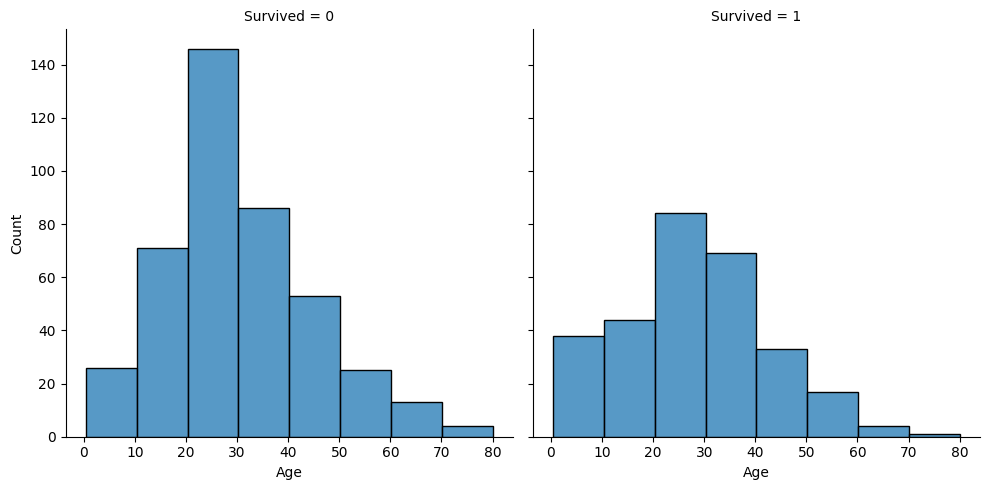

In [17]:
sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5)

In [18]:
train_df['Age_Cut'] = pd.qcut(train_df['Age'],8)
test_df['Age_Cut'] = pd.qcut(test_df['Age'],8)

In [19]:
train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

C:\Users\loren\AppData\Local\Temp\ipykernel_3548\1587675067.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()


Age_Cut  Survived
0   (0.419, 16.0]  0.550000
1  (16.0, 20.125]  0.341772
2  (20.125, 24.0]  0.367347
3    (24.0, 28.0]  0.352941
4  (28.0, 32.312]  0.416667
5  (32.312, 38.0]  0.450549
6    (38.0, 47.0]  0.329545
7    (47.0, 80.0]  0.415730

In [20]:
train_df['Age_Cut'].value_counts()


Age_Cut
(0.419, 16.0]     100
(20.125, 24.0]     98
(32.312, 38.0]     91
(47.0, 80.0]       89
(38.0, 47.0]       88
(24.0, 28.0]       85
(28.0, 32.312]     84
(16.0, 20.125]     79
Name: count, dtype: int64

In [21]:
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <=20.125) , 'Age'] = 1
train_df.loc[(train_df['Age'] > 20.125) & (train_df['Age'] <=24) , 'Age'] = 2
train_df.loc[(train_df['Age'] > 24) & (train_df['Age'] <=28) , 'Age'] = 3
train_df.loc[(train_df['Age'] > 28) & (train_df['Age'] <=32.312) , 'Age'] = 4
train_df.loc[(train_df['Age'] > 32.312) & (train_df['Age'] <=38) , 'Age'] = 5
train_df.loc[(train_df['Age'] > 38) & (train_df['Age'] <=47) , 'Age'] = 6
train_df.loc[(train_df['Age'] > 47) & (train_df['Age'] <=80) , 'Age'] = 7
train_df.loc[train_df['Age'] > 80, 'Age'] 


test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <=20.125) , 'Age'] = 1
test_df.loc[(test_df['Age'] > 20.125) & (test_df['Age'] <=24) , 'Age'] = 2
test_df.loc[(test_df['Age'] > 24) & (test_df['Age'] <=28) , 'Age'] = 3
test_df.loc[(test_df['Age'] > 28) & (test_df['Age'] <=32.312) , 'Age'] = 4
test_df.loc[(test_df['Age'] > 32.312) & (test_df['Age'] <=38) , 'Age'] = 5
test_df.loc[(test_df['Age'] > 38) & (test_df['Age'] <=47) , 'Age'] = 6
test_df.loc[(test_df['Age'] > 47) & (test_df['Age'] <=80) , 'Age'] = 7
test_df.loc[test_df['Age'] > 80, 'Age'] 



Series([], Name: Age, dtype: float64)

In [22]:
train_df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  2.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  5.0      1   
2                             Heikkinen, Miss. Laina  female  3.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  5.0      1   
4                           Allen, Mr. William Henry    male  5.0      0   

   Parch            Ticket     Fare Cabin Embarked  Family_size  \
0      0         A/5 21171   7.2500   NaN        S            2   
1      0          PC 17599  71.2833   C85        C            2   
2      0  STON/O2. 3101282   7.9250   NaN        S            1   
3      0            113803  53.1000  C123        S            2   
4      0            373450   8.0500   NaN        S            1   

  Family_Size_Grouped         Age_Cut  
0               Small  (20.125, 24.0]  
1               Small  (32.312, 38.0]  
2               Alone    (24.0, 28.0]  
3               Small  (32.312, 38.0]  
4               Alone  (32.312, 38.0]

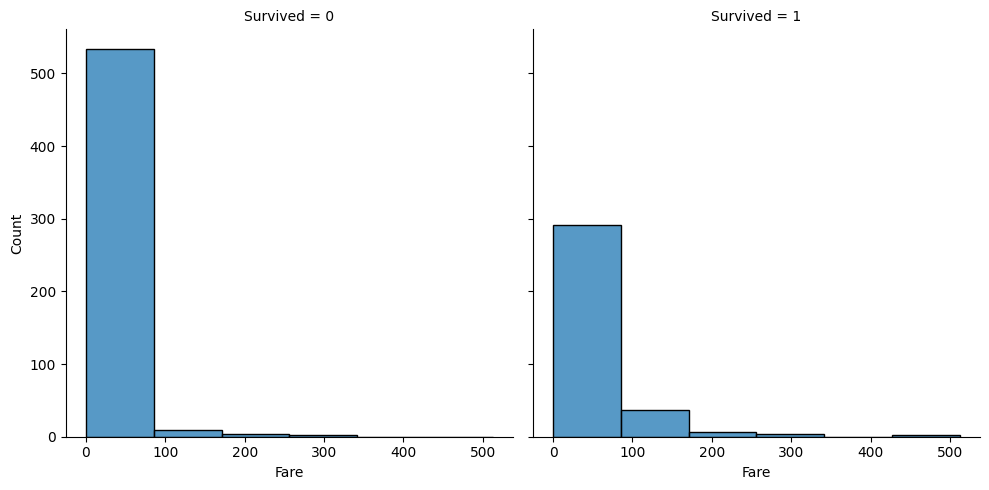

In [23]:
sns.displot(train_df, x = 'Fare', col = 'Survived', binwidth = 80, height=5)

In [24]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'],6)
test_df['Fare_Cut'] = pd.qcut(test_df['Fare'],6)

In [25]:
train_df.head(8)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  2.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  5.0      1   
2                             Heikkinen, Miss. Laina  female  3.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  5.0      1   
4                           Allen, Mr. William Henry    male  5.0      0   
5                                   Moran, Mr. James    male  NaN      0   
6                            McCarthy, Mr. Timothy J    male  7.0      0   
7                     Palsson, Master. Gosta Leonard    male  0.0      3   

   Parch            Ticket     Fare Cabin Embarked  Family_size  \
0      0         A/5 21171   7.2500   NaN        S            2   
1      0          PC 17599  71.2833   C85        C            2   
2      0  STON/O2. 3101282   7.9250   NaN        S            1   
3      0            113803  53.1000  C123        S            2   
4      0            373450   8.0500   NaN        S            1   
5      0            330877   8.4583   NaN        Q            1   
6      0             17463  51.8625   E46        S            1   
7      1            349909  21.0750   NaN        S            5   

  Family_Size_Grouped         Age_Cut           Fare_Cut  
0               Small  (20.125, 24.0]    (-0.001, 7.775]  
1               Small  (32.312, 38.0]  (52.369, 512.329]  
2               Alone    (24.0, 28.0]     (7.775, 8.662]  
3               Small  (32.312, 38.0]  (52.369, 512.329]  
4               Alone  (32.312, 38.0]     (7.775, 8.662]  
5               Alone             NaN     (7.775, 8.662]  
6               Alone    (47.0, 80.0]     (26.0, 52.369]  
7              Medium   (0.419, 16.0]     (14.454, 26.0]

In [26]:
train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

C:\Users\loren\AppData\Local\Temp\ipykernel_3548\1994933730.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()


Fare_Cut  Survived
0    (-0.001, 7.775]  0.205128
1     (7.775, 8.662]  0.190789
2    (8.662, 14.454]  0.366906
3     (14.454, 26.0]  0.436242
4     (26.0, 52.369]  0.417808
5  (52.369, 512.329]  0.697987

In [27]:
# Asignar valores según los rangos de Fare_Cut
train_df.loc[train_df['Fare'] <= 7.775, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 8.662), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 8.662) & (train_df['Fare'] <= 14.454), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 26.0), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 26.0) & (train_df['Fare'] <= 52.369), 'Fare'] = 4
train_df.loc[(train_df['Fare'] > 52.369) & (train_df['Fare'] <= 512.369), 'Fare'] = 5
train_df.loc[train_df['Fare'] > 512.369, 'Fare']


# Realizar lo mismo para el conjunto de test
test_df.loc[test_df['Fare'] <= 7.775, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.775) & (test_df['Fare'] <= 8.662), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 8.662) & (test_df['Fare'] <= 14.454), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 26.0), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 26.0) & (test_df['Fare'] <= 52.369), 'Fare'] = 4
test_df.loc[(test_df['Fare'] > 52.369) & (test_df['Fare'] <= 512.369), 'Fare'] = 5
test_df.loc[test_df['Fare'] > 512.369, 'Fare']

Series([], Name: Fare, dtype: float64)

In [28]:
train_df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  2.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  5.0      1   
2                             Heikkinen, Miss. Laina  female  3.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  5.0      1   
4                           Allen, Mr. William Henry    male  5.0      0   
5                                   Moran, Mr. James    male  NaN      0   
6                            McCarthy, Mr. Timothy J    male  7.0      0   
7                     Palsson, Master. Gosta Leonard    male  0.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  3.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  0.0      1   

   Parch            Ticket  Fare Cabin Embarked  Family_size  \
0      0         A/5 21171   0.0   NaN        S            2   
1      0          PC 17599   5.0   C85        C            2   
2      0  STON/O2. 3101282   1.0   NaN        S            1   
3      0            113803   5.0  C123        S            2   
4      0            373450   1.0   NaN        S            1   
5      0            330877   1.0   NaN        Q            1   
6      0             17463   4.0   E46        S            1   
7      1            349909   3.0   NaN        S            5   
8      2            347742   2.0   NaN        S            3   
9      0            237736   4.0   NaN        C            2   

  Family_Size_Grouped         Age_Cut           Fare_Cut  
0               Small  (20.125, 24.0]    (-0.001, 7.775]  
1               Small  (32.312, 38.0]  (52.369, 512.329]  
2               Alone    (24.0, 28.0]     (7.775, 8.662]  
3               Small  (32.312, 38.0]  (52.369, 512.329]  
4               Alone  (32.312, 38.0]     (7.775, 8.662]  
5               Alone             NaN     (7.775, 8.662]  
6               Alone    (47.0, 80.0]     (26.0, 52.369]  
7              Medium   (0.419, 16.0]     (14.454, 26.0]  
8               Small    (24.0, 28.0]    (8.662, 14.454]  
9               Small   (0.419, 16.0]     (26.0, 52.369]

In [29]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [30]:
train_df['Title'] = train_df['Name'].str.split(pat=",", expand = True)[1].str.split(pat=".", expand = True)[0].apply(lambda x: x.strip())
test_df['Title'] = test_df['Name'].str.split(pat=",", expand = True)[1].str.split(pat=".", expand = True)[0].apply(lambda x: x.strip())

In [31]:
train_df.groupby(['Title'], as_index=False)['Survived'].mean()

Title  Survived
0           Capt  0.000000
1            Col  0.500000
2            Don  0.000000
3             Dr  0.428571
4       Jonkheer  0.000000
5           Lady  1.000000
6          Major  0.500000
7         Master  0.575000
8           Miss  0.697802
9           Mlle  1.000000
10           Mme  1.000000
11            Mr  0.156673
12           Mrs  0.792000
13            Ms  1.000000
14           Rev  0.000000
15           Sir  1.000000
16  the Countess  1.000000

In [32]:
train_df['Title'] = train_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble',
    
})

test_df['Title'] = test_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble',
    
})

In [33]:
train_df.groupby(['Title'], as_index = False)['Survived'].agg(['count', 'mean'])

Title  count      mean
0        Dr      7  0.428571
1    Master     40  0.575000
2  Military      5  0.400000
3      Miss    182  0.697802
4        Mr    517  0.156673
5       Mrs    125  0.792000
6     Noble      9  0.777778
7       Rev      6  0.000000

In [34]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x: len(x)) #IMPORTANCE ?!

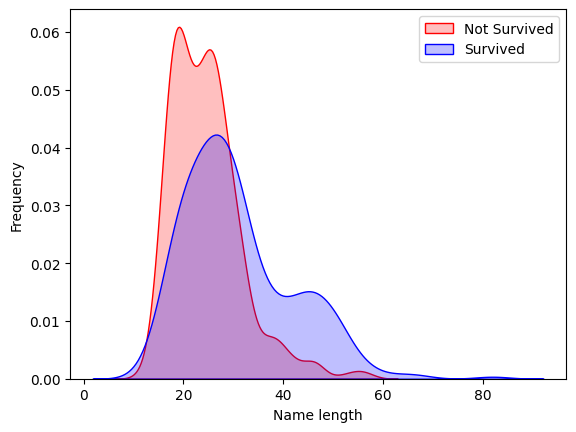

In [35]:
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==0) & (train_df['Name_Length'].notnull())], color = 'Red', fill=True)
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==1) & (train_df['Name_Length'].notnull())], ax=g, color = 'Blue', fill=True)
g.set_xlabel('Name length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

In [36]:
train_df['Name_LengthGB'] = pd.qcut(train_df['Name_Length'],8)
test_df['Name_LengthGB'] = pd.qcut(test_df['Name_Length'],8)

In [37]:
train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()

C:\Users\loren\AppData\Local\Temp\ipykernel_3548\554738133.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()


Name_LengthGB  Survived
0  (11.999, 18.0]  0.214286
1    (18.0, 20.0]  0.252427
2    (20.0, 23.0]  0.307692
3    (23.0, 25.0]  0.346939
4   (25.0, 27.25]  0.292929
5   (27.25, 30.0]  0.428571
6    (30.0, 38.0]  0.517241
7    (38.0, 82.0]  0.745283

In [38]:
# Asignar categorías según los rangos de Name_Size en train_df
train_df.loc[(train_df['Name_Length'] > 11.999) & (train_df['Name_Length'] <= 18.0), 'Name_Size'] = 0
train_df.loc[(train_df['Name_Length'] > 18.0) & (train_df['Name_Length'] <= 20.0), 'Name_Size'] = 1
train_df.loc[(train_df['Name_Length'] > 20.0) & (train_df['Name_Length'] <= 23.0), 'Name_Size'] = 2
train_df.loc[(train_df['Name_Length'] > 23.0) & (train_df['Name_Length'] <= 25.0), 'Name_Size'] = 3
train_df.loc[(train_df['Name_Length'] > 25.0) & (train_df['Name_Length'] <= 27.25), 'Name_Size'] = 4
train_df.loc[(train_df['Name_Length'] > 27.25) & (train_df['Name_Length'] <= 30.0), 'Name_Size'] = 5
train_df.loc[(train_df['Name_Length'] > 30.0) & (train_df['Name_Length'] <= 38.0), 'Name_Size'] = 6
train_df.loc[(train_df['Name_Length'] > 38.0) & (train_df['Name_Length'] <= 82.0), 'Name_Size'] = 7
train_df.loc[train_df['Name_Length'] > 82, 'Name_Size']
            


Series([], Name: Name_Size, dtype: float64)

In [39]:
# Asignar categorías según los rangos de Name_Size en train_df
test_df.loc[(test_df['Name_Length'] > 11.999) & (test_df['Name_Length'] <= 18.0), 'Name_Size'] = 0
test_df.loc[(test_df['Name_Length'] > 18.0) & (test_df['Name_Length'] <= 20.0), 'Name_Size'] = 1
test_df.loc[(test_df['Name_Length'] > 20.0) & (test_df['Name_Length'] <= 23.0), 'Name_Size'] = 2
test_df.loc[(test_df['Name_Length'] > 23.0) & (test_df['Name_Length'] <= 25.0), 'Name_Size'] = 3
test_df.loc[(test_df['Name_Length'] > 25.0) & (test_df['Name_Length'] <= 27.25), 'Name_Size'] = 4
test_df.loc[(test_df['Name_Length'] > 27.25) & (test_df['Name_Length'] <= 30.0), 'Name_Size'] = 5
test_df.loc[(test_df['Name_Length'] > 30.0) & (test_df['Name_Length'] <= 38.0), 'Name_Size'] = 6
test_df.loc[(test_df['Name_Length'] > 38.0) & (test_df['Name_Length'] <= 82.0), 'Name_Size'] = 7
test_df.loc[test_df['Name_Length'] > 82, 'Name_Size']
            


Series([], Name: Name_Size, dtype: float64)

In [40]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  2.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  5.0      1   
2                             Heikkinen, Miss. Laina  female  3.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  5.0      1   
4                           Allen, Mr. William Henry    male  5.0      0   

   Parch            Ticket  Fare Cabin Embarked  Family_size  \
0      0         A/5 21171   0.0   NaN        S            2   
1      0          PC 17599   5.0   C85        C            2   
2      0  STON/O2. 3101282   1.0   NaN        S            1   
3      0            113803   5.0  C123        S            2   
4      0            373450   1.0   NaN        S            1   

  Family_Size_Grouped         Age_Cut           Fare_Cut Title  Name_Length  \
0               Small  (20.125, 24.0]    (-0.001, 7.775]    Mr           23   
1               Small  (32.312, 38.0]  (52.369, 512.329]   Mrs           51   
2               Alone    (24.0, 28.0]     (7.775, 8.662]  Miss           22   
3               Small  (32.312, 38.0]  (52.369, 512.329]   Mrs           44   
4               Alone  (32.312, 38.0]     (7.775, 8.662]    Mr           24   

  Name_LengthGB  Name_Size  
0  (20.0, 23.0]        2.0  
1  (38.0, 82.0]        7.0  
2  (20.0, 23.0]        2.0  
3  (38.0, 82.0]        7.0  
4  (23.0, 25.0]        3.0

In [41]:
train_df.groupby(['Name_Size'], as_index= False)['Survived'].agg(['count','mean'])

Name_Size  count      mean
0        0.0    140  0.214286
1        1.0    103  0.252427
2        2.0    117  0.307692
3        3.0     98  0.346939
4        4.0     99  0.292929
5        5.0    112  0.428571
6        6.0    116  0.517241
7        7.0    106  0.745283

In [42]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [43]:
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [44]:
train_df.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count','mean']).sort_values('count', ascending = False)

TicketNumber  count      mean
464       347082      7  0.000000
196         2343      7  0.000000
94          1601      7  0.714286
168         2144      6  0.000000
468       347088      6  0.000000
..           ...    ...       ...
271         2662      1  0.000000
272         2663      1  1.000000
273         2664      1  0.000000
276         2667      1  1.000000
339      3101274      1  0.000000

[679 rows x 3 columns]

In [45]:
train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketNumber, Length: 891, dtype: int64

In [46]:
train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [47]:
train_df.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count','mean']).sort_values('count', ascending = False)

TicketNumberCounts  count      mean
0                   1    544  0.295956
1                   2    188  0.569149
2                   3     66  0.712121
3                   4     44  0.500000
6                   7     21  0.238095
5                   6     18  0.000000
4                   5     10  0.000000

In [48]:
train_df.head(30)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
26           27         0       3   
27           28         0       1   
28           29         1       3   
29           30         0       3   

                                                 Name     Sex  Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  2.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  5.0      1   
2                              Heikkinen, Miss. Laina  female  3.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  5.0      1   
4                            Allen, Mr. William Henry    male  5.0      0   
5                                    Moran, Mr. James    male  NaN      0   
6                             McCarthy, Mr. Timothy J    male  7.0      0   
7                      Palsson, Master. Gosta Leonard    male  0.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  3.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  0.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female  0.0      1   
11                           Bonnell, Miss. Elizabeth  female  7.0      0   
12                     Saundercock, Mr. William Henry    male  1.0      0   
13                        Andersson, Mr. Anders Johan    male  6.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  0.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  7.0      0   
16                               Rice, Master. Eugene    male  0.0      4   
17                       Williams, Mr. Charles Eugene    male  NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  4.0      1   
19                            Masselmani, Mrs. Fatima  female  NaN      0   
20                               Fynney, Mr. Joseph J    male  5.0      0   
21                              Beesley, Mr. Lawrence    male  5.0      0   
22                        McGowan, Miss. Anna "Annie"  female  0.0      0   
23                       Sloper, Mr. William Thompson    male  3.0      0   
24                      Palsson, Miss. Torborg Danira  female  0.0      3   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  5.0      1   
26                            Emir, Mr. Farred Chehab    male  NaN      0   
27                     Fortune, Mr. Charles Alexander    male  1.0      3   
28                      O'Dwyer, Miss. Ellen "Nellie"  female  NaN      0   
29                                Todoroff, Mr. Lalio    male  NaN      0   

    Parch            Ticket  Fare  ... Family_size Family_Size_Grouped  \
0       0         A/5 21171   0.0  ...           2               Small   
1       0          PC 17599   5.0  ...           2               Small   
2       0  STON/O2. 3101282   1.0  ...           1               Alone   
3       0            113803   5.0  ...           2               Small   
4       0            373450   1.0  ...           1               Alone   
5       0            330

In [49]:
train_df['Ticket'].str.split(pat=" ", expand=True)

0        1     2
0         A/5    21171  None
1          PC    17599  None
2    STON/O2.  3101282  None
3      113803     None  None
4      373450     None  None
..        ...      ...   ...
886    211536     None  None
887    112053     None  None
888     W./C.     6607  None
889    111369     None  None
890    370376     None  None

[891 rows x 3 columns]

In [50]:
train_df['TicketLocation'] = train_df['Ticket'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else np.nan)

test_df['TicketLocation'] = test_df['Ticket'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else np.nan)


In [51]:
train_df['TicketLocation'].value_counts()

TicketLocation
PC            60
C.A.          27
STON/O        12
A/5           10
W./C.          9
CA.            8
SOTON/O.Q.     8
A/5.           7
SOTON/OQ       7
STON/O2.       6
CA             6
F.C.C.         5
C              5
SC/PARIS       5
S.O.C.         5
SC/Paris       4
A/4.           3
S.O./P.P.      3
SC/AH          3
PP             3
A/4            3
P/PP           2
S.C./PARIS     2
SOTON/O2       2
A.5.           2
WE/P           2
A./5.          2
A/S            1
SO/C           1
F.C.           1
S.W./PP        1
SW/PP          1
SC             1
SCO/W          1
W/C            1
Fa             1
S.O.P.         1
S.C./A.4.      1
A4.            1
S.P.           1
W.E.P.         1
C.A./SOTON     1
Name: count, dtype: int64

In [52]:

# Crear un diccionario de equivalencias para unificar variaciones manualmente
ticket_mapping = {
    'PC': 'PC',
    'C.A.': 'CA',
    'CA.': 'CA',
    'SOTON/O.Q.': 'SOTON/OQ',
    'SOTON/OQ': 'SOTON/OQ',
    'STON/O2.': 'STON/O2',
    'A/5': 'A/5',
    'A/5.': 'A/5',
    'A/4': 'A/4',
    'A/4.': 'A/4',
    'SC/PARIS': 'SC/PARIS',
    'SC/Paris': 'SC/PARIS',
    'S.O.C.': 'SOC',
    'S.O./P.P.': 'SOPP',
    'SC/AH': 'SCAH',
    'PP': 'PP',
    'P/PP': 'PP',
    'S.C./PARIS': 'SC/PARIS',
    'A.5.': 'A/5',
    'WE/P': 'WEP',
    'W./C.': 'W/C',
    'W/C': 'W/C',
    'A./5.': 'A/5',
    'SO/C': 'SOC',
    'SOTON/O2': 'SOTON/O2',
    'SW/PP': 'SW/PP',
    'S.W./PP': 'SW/PP',
    'F.C.C.': 'FCC',
    'F.C.': 'FCC',
    'Fa': 'Fa',
    # Agrega más mapeos aquí si es necesario
}

# Limpiar la columna TicketLocation
train_df['TicketLocation'] = train_df['TicketLocation'].str.upper()  # Convertir a mayúsculas
train_df['TicketLocation'] = train_df['TicketLocation'].str.replace('.', '', regex=False)  # Eliminar puntos
train_df['TicketLocation'] = train_df['TicketLocation'].str.strip()  # Eliminar espacios al inicio y final

# Aplicar el mapeo manual para unificar las variaciones
train_df['TicketLocation'] = train_df['TicketLocation'].replace(ticket_mapping)

# Opcional: Para manejar otros valores que no están en el diccionario y que quieras unificar automáticamente:
train_df['TicketLocation'] = train_df['TicketLocation'].fillna('UNKNOWN')  # Reemplazar valores faltantes si es necesario


In [53]:
train_df['TicketLocation']

0          A/5
1           PC
2      STON/O2
3      UNKNOWN
4      UNKNOWN
        ...   
886    UNKNOWN
887    UNKNOWN
888        W/C
889    UNKNOWN
890    UNKNOWN
Name: TicketLocation, Length: 891, dtype: object

In [54]:
train_df.groupby(['TicketLocation'], as_index = False)['Survived'].agg(['count','mean'])

TicketLocation  count      mean
0             A/4      6  0.000000
1             A/5     19  0.105263
2             A/S      1  0.000000
3              A4      1  0.000000
4              A5      2  0.000000
5               C      5  0.400000
6              CA     41  0.341463
7        CA/SOTON      1  0.000000
8              FA      1  0.000000
9              FC      1  0.000000
10            FCC      5  0.800000
11             PC     60  0.650000
12             PP      5  0.600000
13             SC      1  1.000000
14          SC/A4      1  0.000000
15       SC/PARIS     11  0.454545
16           SCAH      3  0.666667
17          SCO/W      1  0.000000
18          SO/PP      3  0.000000
19            SOC      6  0.166667
20            SOP      1  0.000000
21       SOTON/O2      2  0.000000
22       SOTON/OQ     15  0.133333
23             SP      1  0.000000
24         STON/O     12  0.416667
25        STON/O2      6  0.500000
26          SW/PP      2  1.000000
27        UNKNOWN    665  0.383459
28            W/C     10  0.100000
29            WEP      3  0.333333

In [55]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

In [56]:
test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [57]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count','mean'])

Cabin  count      mean
0     A     15  0.466667
1     B     47  0.744681
2     C     59  0.593220
3     D     33  0.757576
4     E     32  0.750000
5     F     13  0.615385
6     G      4  0.500000
7     T      1  0.000000
8     U    687  0.299854

In [58]:
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)


In [59]:
train_df.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count','mean'])

Cabin_Assigned  count      mean
0               0    687  0.299854
1               1    204  0.666667

In [60]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  2.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  5.0      1   
2                             Heikkinen, Miss. Laina  female  3.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  5.0      1   
4                           Allen, Mr. William Henry    male  5.0      0   

   Parch            Ticket  Fare  ...         Age_Cut           Fare_Cut  \
0      0         A/5 21171   0.0  ...  (20.125, 24.0]    (-0.001, 7.775]   
1      0          PC 17599   5.0  ...  (32.312, 38.0]  (52.369, 512.329]   
2      0  STON/O2. 3101282   1.0  ...    (24.0, 28.0]     (7.775, 8.662]   
3      0            113803   5.0  ...  (32.312, 38.0]  (52.369, 512.329]   
4      0            373450   1.0  ...  (32.312, 38.0]     (7.775, 8.662]   

   Title Name_Length Name_LengthGB Name_Size TicketNumber  TicketNumberCounts  \
0     Mr          23  (20.0, 23.0]       2.0        21171                   1   
1    Mrs          51  (38.0, 82.0]       7.0        17599                   1   
2   Miss          22  (20.0, 23.0]       2.0      3101282                   1   
3    Mrs          44  (38.0, 82.0]       7.0       113803                   2   
4     Mr          24  (23.0, 25.0]       3.0       373450                   1   

  TicketLocation  Cabin_Assigned  
0            A/5               0  
1             PC               1  
2        STON/O2               0  
3        UNKNOWN               1  
4        UNKNOWN               0  

[5 rows x 24 columns]

In [61]:
train_df.shape

(891, 24)

In [62]:
test_df.shape

(418, 23)

In [63]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    object  
 4   Sex                  891 non-null    object  
 5   Age                  714 non-null    float64 
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    object  
 9   Fare                 891 non-null    float64 
 10  Cabin                891 non-null    object  
 11  Embarked             889 non-null    object  
 12  Family_size          891 non-null    int64   
 13  Family_Size_Grouped  891 non-null    object  
 14  Age_Cut              714 non-null    category
 15  Fare_Cut             89

In [64]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size',
       'Family_Size_Grouped', 'Age_Cut', 'Fare_Cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_Size', 'TicketNumber', 'TicketNumberCounts',
       'TicketLocation', 'Cabin_Assigned'],
      dtype='object')

In [65]:
# Rellenar valores nulos en la columna 'Age' en el DataFrame train_df
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

# Rellenar valores nulos en la columna 'Age' en el DataFrame test_df
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

# Rellenar valores nulos en la columna 'Fare' en el DataFrame test_df
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())


In [66]:
ohe = OneHotEncoder(sparse_output = False)
ode = OrdinalEncoder()
SI = SimpleImputer(strategy='most_frequent')

In [67]:
ode_cols = ['Family_Size_Grouped']
ohe_cols = ['Sex', 'Embarked']

In [68]:
X = train_df.drop(['Survived'], axis =1)

In [69]:
y= train_df['Survived']

In [70]:
X_test = test_df.drop(['Age_Cut', 'Fare_Cut'], axis=1)

In [71]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, stratify= y, random_state=21)

In [72]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))     
])


In [73]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown= 'ignore',sparse_output=False))     
])

In [74]:
col_trans = ColumnTransformer(transformers = [
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
    ('passthrough', 'passthrough', ['Pclass','TicketNumberCounts','Cabin_Assigned', 'Name_Size','Age','Fare'])
    ],
    remainder='drop',
    n_jobs=-1
)

In [75]:
rfc = RandomForestClassifier()

In [76]:
param_grid= {
    'n_estimators':[100,150,200],
    'min_samples_split': [5,10,15],
    'max_depth' : [8,9,10,15,20],
    'min_samples_leaf' : [1,2,4],
    'criterion' : ['gini','entropy']
}

In [77]:
CV_rfc = GridSearchCV(estimator=rfc,param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [78]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10, 15, 20],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [100, 150, 200]}))])

In [79]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
0.8286516300600809


In [80]:
dtc = DecisionTreeClassifier()

In [84]:
param_grid= {
    'min_samples_split': [5,10,15],
    'max_depth' : [10,20,30],
    'min_samples_leaf' : [1,2,4],
    'criterion' : ['gini','entropy']
}

In [85]:
CV_dtc = GridSearchCV(estimator=dtc,param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [86]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [87]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15}
0.8159854230276766


In [97]:
knn = KNeighborsClassifier()

In [98]:
param_grid= {
    'n_neighbors':[3,5,7,9,11],
    'weights': ['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'p': [1,2],
}

In [99]:
CV_knn = GridSearchCV(estimator=knn,param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [100]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [101]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'brute', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
0.8062444597655866


In [102]:
svc = SVC()

In [103]:
param_grid= {
    'C':[100,10,1.0,0.1,0.01,0.001],
    'kernel': ['linear','poly','rbf','sigmoid'],
}

In [104]:
CV_svc = GridSearchCV(estimator=svc,param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [105]:
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [106]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.8328769821727567


In [107]:
lr= LogisticRegression()

In [108]:
param_grid= {
    'C':[100,10,1.0,0.1,0.01,0.001],
}

In [109]:
CV_lr = GridSearchCV(estimator=lr,param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [110]:
pipefinallr = make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train,y_train)

C:\Users\loren\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.01,
                                                0.001]}))])

In [111]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 0.1}
0.8020092583472864


In [112]:
gnb = GaussianNB()

In [113]:
param_grid= {
    'var_smoothing': [0.00000001, 0.00000001, 0.00000001]  # Los val de la doc
}

In [114]:
CV_gnb = GridSearchCV(estimator=gnb,param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [115]:
pipefinalgnb = make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-08,
                                                            1e-08]}))])

In [117]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-08}
0.7781443908204471


In [118]:
Y_pred = pipefinalrfc.predict(X_test)
Y_pred2 = pipefinaldtc.predict(X_test)
Y_pred3 = pipefinalknn.predict(X_test)
Y_pred4 = pipefinalsvc.predict(X_test)
Y_pred5 = pipefinallr.predict(X_test)
Y_pred6 = pipefinalgnb.predict(X_test)

In [120]:
submission = pd.DataFrame ({
    'PassengerId':test_df['PassengerId'],
    'Survived': Y_pred
})

submission2 = pd.DataFrame ({
    'PassengerId':test_df['PassengerId'],
    'Survived': Y_pred2
})
submission3 = pd.DataFrame ({
    'PassengerId':test_df['PassengerId'],
    'Survived': Y_pred3
})
submission4 = pd.DataFrame ({
    'PassengerId':test_df['PassengerId'],
    'Survived': Y_pred4
})
submission5 = pd.DataFrame ({
    'PassengerId':test_df['PassengerId'],
    'Survived': Y_pred5
})
submission6 = pd.DataFrame ({
    'PassengerId':test_df['PassengerId'],
    'Survived': Y_pred6
})

In [124]:
submission.to_csv('C:\\Users\\loren\\Desktop\\ML_Workspace\\Projects\\Titanic-Machine_Learning_from_disaster\\Results\\submission.csv', index=False)
submission2.to_csv('C:\\Users\\loren\\Desktop\\ML_Workspace\\Projects\\Titanic-Machine_Learning_from_disaster\\Results\\submission2.csv', index=False)
submission3.to_csv('C:\\Users\\loren\\Desktop\\ML_Workspace\\Projects\\Titanic-Machine_Learning_from_disaster\\Results\\submission3.csv', index=False)
submission4.to_csv('C:\\Users\\loren\\Desktop\\ML_Workspace\\Projects\\Titanic-Machine_Learning_from_disaster\\Results\\submission4.csv', index=False)
submission5.to_csv('C:\\Users\\loren\\Desktop\\ML_Workspace\\Projects\\Titanic-Machine_Learning_from_disaster\\Results\\submission5.csv', index=False)
submission6.to_csv('C:\\Users\\loren\\Desktop\\ML_Workspace\\Projects\\Titanic-Machine_Learning_from_disaster\\Results\\submission6.csv', index=False)
